# Aula 17 - Estatística pt2 - Estatística Descritiva

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Estatística Descritiva
    - 1.1) Medidas de posição
    - 1.2) Medidas de dispersão
    - 1.3) Boxplot
    - 1.4) Outliers

_____________

### Problema gerador: como estão distribuídas as alturas e pesos das pessoas de uma população? Quais as aturas mais comuns? E as mais incomuns?

Você trabalha na prefeitura de uma grande cidade, que, como parte do censo populacional, coletou as alturas e pesos de uma alturas de sua população, de 10000 observações, balanceada com relação ao sexo. Como analista de dados, é seu dever resumir este conjunto de dados com as principais conclusões

____

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("alturas_pesos.csv")

df

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


In [ ]:
df["sexo"].value_counts()

M    5000
F    5000
Name: sexo, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sexo    10000 non-null  object 
 1   altura  10000 non-null  float64
 2   peso    10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## 1) Estatística Descritiva

Como mencionamos, o principal objetivo da estatística descritiva é gerar **medidas que resumam** o conjunto de dados que estamos analisando, ou seja, medidas que descrevam **a distribuição** dos dados, de forma quantitativa. Vamos dar uma olhada nessas medidas!


In [ ]:
df.describe()

,altura,peso
count,10000.000000,10000.000000
mean,168.573573,73.228860
std,9.772756,14.564286
min,137.830000,29.350000
25%,161.300000,61.610000
50%,168.450000,73.125000
75%,175.702500,84.902500
max,200.660000,122.470000


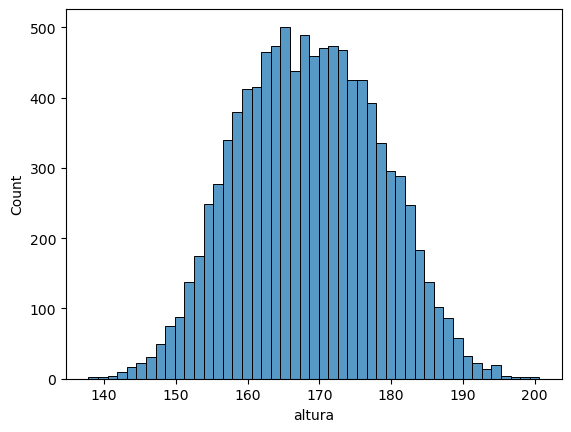

In [ ]:
sns.histplot(data=df, x="altura");

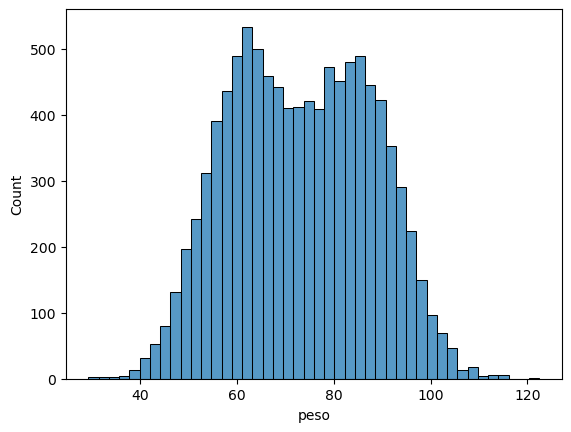

In [ ]:
sns.histplot(data=df, x="peso");

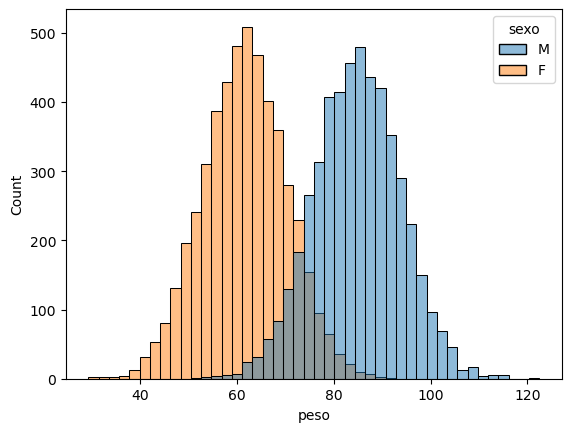

In [ ]:
sns.histplot(data=df, x="peso", hue="sexo");

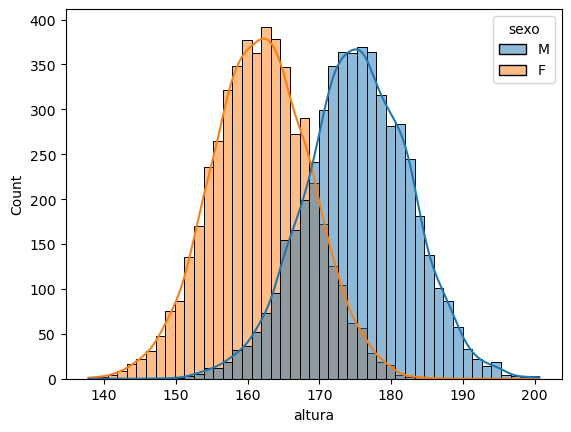

In [ ]:
sns.histplot(data=df, x="altura", hue="sexo", kde=True);

In [ ]:
dados = {
    "F" : df.query("sexo == 'F'").copy(),
    "M" : df.query("sexo == 'M'").copy()
}

In [ ]:
dados["M"]

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
4995,M,174.90,80.35
4996,M,175.19,72.25
4997,M,170.22,90.35
4998,M,181.76,84.33


________

### 1.1) Medidas de posição

Estas são medidas que **resumem** algumas propriedades do conjunto de dados:

<img src="https://i.pinimg.com/originals/3e/8a/90/3e8a90c122ad25240cc46ac075cb0f4c.png" width=200>

#### 1.1.1) Média

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{X}$ como sendo :


$$\overline{X} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [ ]:
df["altura"].mean()

168.5735729999993

In [ ]:
sum(df["altura"].values)/len(df["altura"].values)

168.5735729999993

In [ ]:
"altura peso".split()

['altura', 'peso']

In [ ]:
df.groupby("sexo")["altura peso".split()].mean()

,altura,peso
sexo,,
F,161.820188,61.625692
M,175.326958,84.832028


#### 1.1.1) Mediana

A **mediana** de uma variável é um número tal que há **a mesma quantidade** de observações maiores e menores do que ele, ocupando assim a **posição central** da série de observações.

Assim, para calcularmos a mediana, basta **ordenarmos os dados, do menor pro maior**, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")

- *Exemplo*

i) `[3, 4, 7, 8, 80]`- **mediana = 7**       (CASO ÍMPAR)

ii) `[3, 4, 7, 8, 8, 9]` - **mediana = (7+8)/2 = 7,5**   (CASO PAR)

In [ ]:
df.groupby("sexo")["altura peso".split()].median()

,altura,peso
sexo,,
F,161.88,61.74
M,175.33,84.84


In [ ]:
df.groupby("sexo")["altura peso".split()].agg(["median", "mean"])

altura               peso           
      median        mean median       mean
sexo                                      
F     161.88  161.820188  61.74  61.625692
M     175.33  175.326958  84.84  84.832028

A mediana é uma medida dita **robusta**, isso é, não é alterada por outliers!

In [ ]:
visitas_restaurante = np.array([3, 4, 7, 8, 8, 9, 25, 50, 8, 5, 4, 3, 3])

In [ ]:
len(visitas_restaurante)

13

In [ ]:
sorted(visitas_restaurante)

[3, 3, 3, 4, 4, 5, 7, 8, 8, 8, 9, 25, 50]

In [ ]:
np.median(visitas_restaurante)

7.0

In [ ]:
visitas_restaurante.mean()

10.538461538461538

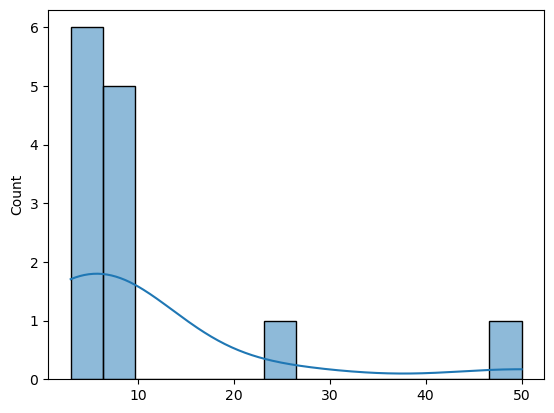

In [ ]:
sns.histplot(visitas_restaurante, kde=True);

#### 1.1.3) Quartis

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados **em quatro partes iguais**.

- O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima;
- O segundo quartil, Q2 é a **mediana**, deixa 50% das observações abaixo e 50% das observações acima;
- O terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima;


<img src="https://aprendendogestao.com.br/wp-content/uploads/2016/07/QE-Figura-1.png" width="700" height="700" />

De maneira mais genérica, podemos definir os **q-quantis** de uma distribuição, que são definidos como os valores que dividem a distribuição em $q$ partes (subconjuntos) ordenadas de tamanho aproximadamente iguais.

Desta maneira, podemos dizer que **k-ésimo q-quantil é o valor x tal que a probabilidade de um evento da variável aleatória será inferior x é no máximo k/q**.

No caso de $q=10$, cada quantil é chamado de **decil**:

<img src="https://aakinshin.net/posts/qrde-hd/img/riddle-light.png" width=600>

> Ou seja, os quartis são simplesmente os **4-quantis**, ou então os **quantis de 25%!**

Podemos usar o numpy para calcular os quantis. Mas, nesse caso, precisamos passar como argumento não a quantidade de quantis, mas sim a **porcentagem de valores que cada quantil terá**.

In [ ]:
np.quantile(df["altura"], q=1/4)

161.3

In [ ]:
q1 = np.quantile(df["altura"], q=0.25)
q2 = np.quantile(df["altura"], q=0.5)
q3 = np.quantile(df["altura"], q=0.75)

print(q1, q2, q3)

161.3 168.45 175.7025


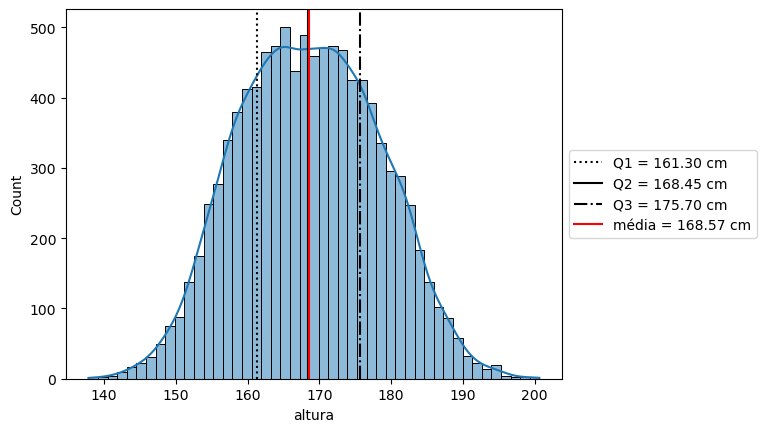

In [ ]:
sns.histplot(data=df, x="altura", kde=True)

q1 = np.quantile(df["altura"], q=0.25)
q2 = np.quantile(df["altura"], q=0.5)
q3 = np.quantile(df["altura"], q=0.75)

media = df["altura"].mean()

plt.axvline(x=q1, label=f"Q1 = {q1:.2f} cm", color="k", ls=":")
plt.axvline(x=q2, label=f"Q2 = {q2:.2f} cm", color="k")
plt.axvline(x=q3, label=f"Q3 = {q3:.2f} cm", color="k", ls="-.")

plt.axvline(x=media, label=f"média = {media:.2f} cm", color="r")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

#### 1.1.4) Moda

A **moda** é o valor que ocorre com **maior frequência** em um conjunto de dados .

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete;

- unimodal: Quando existe apenas um valor repetido com maior frequência;

- multimodal: quando existem mais de um valor com a mesma frequência máxima.

In [ ]:
df["altura"].mode()

0    160.48
1    164.67
2    164.73
3    169.01
4    172.16
Name: altura, dtype: float64

In [ ]:
df["altura"].value_counts()

172.16    10
160.48    10
164.73    10
164.67    10
169.01    10
          ..
164.92     1
183.66     1
190.96     1
183.58     1
150.11     1
Name: altura, Length: 3639, dtype: int64

In [ ]:
df["altura_m"] = np.round(df["altura"]/100, 2)

In [ ]:
df["altura_m"].value_counts()

1.64    371
1.62    364
1.71    362
1.65    362
1.73    360
       ... 
1.40      1
1.98      1
2.00      1
2.01      1
1.38      1
Name: altura_m, Length: 64, dtype: int64

In [ ]:
df["altura_m"].mode()

0    1.64
Name: altura_m, dtype: float64

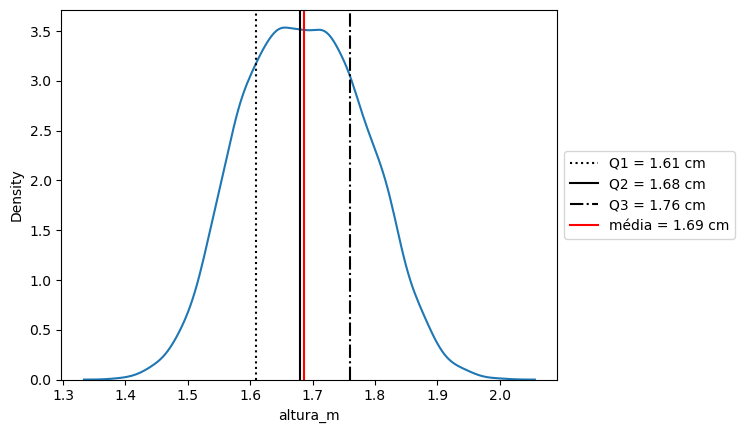

In [ ]:
# sns.histplot(data=df, x="altura_m", kde=True)
sns.kdeplot(data=df, x="altura_m")

q1 = np.quantile(df["altura_m"], q=0.25)
q2 = np.quantile(df["altura_m"], q=0.5)
q3 = np.quantile(df["altura_m"], q=0.75)

media = df["altura_m"].mean()

plt.axvline(x=q1, label=f"Q1 = {q1:.2f} cm", color="k", ls=":")
plt.axvline(x=q2, label=f"Q2 = {q2:.2f} cm", color="k")
plt.axvline(x=q3, label=f"Q3 = {q3:.2f} cm", color="k", ls="-.")

plt.axvline(x=media, label=f"média = {media:.2f} cm", color="r")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

____

### 1.2) Medidas de dispersão

Estas são **medidas de variabilidade**, que indicam o quanto as observações variam ao redor de alguma medida de centralidade (média, mediana, etc.).

Em outras palavras, indicam **o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável**.

Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

#### 1.2.1) Amplitude

A amplitude é a **diferença entre o maior e o menor valor observado**.

- **Fortemente influenciada** por valores extremos nas observações, como outliers.

In [ ]:
df.describe().loc["min max".split()]

,altura,peso,altura_m
min,137.83,29.35,1.38
max,200.66,122.47,2.01


In [ ]:
for var in df.select_dtypes(include=np.number):

    print(f"Amplitude da variável {var}: {(df[var].max() - df[var].min()):.2f}")

Amplitude da variável altura: 62.83
Amplitude da variável peso: 93.12
Amplitude da variável altura_m: 0.63


In [ ]:
visitas_restaurante.max() - visitas_restaurante.min()

47

####  1.2.2) Variância

A variância representa **o quanto os dados se afastam da média, em geral**. Por definição, tomamos a média dos **desvios quadráticos da média**:

$$ Var(X) = \sum_{i=1}^{n}\frac{(x_i-\overline{x})^{2}}{n}$$

In [ ]:
for col in df.select_dtypes(include=np.number):

    print(f"Variância da variável {col}: {(df[col].var()):.2f}")

Variância da variável altura: 95.51
Variância da variável peso: 212.12
Variância da variável altura_m: 0.01


####  1.2.3) Desvio padrão (std) - standard deviation

Note que, da forma como foi definida, a variância é um valor **quadrático** nos dados. Para evitar isso, é comum tirar a raiz quadrada da variância, o que define o **desvio padrão**:

$$ \sigma(X) \equiv \sqrt{Var(X)} = \sqrt{\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{2}}{n}}$$

In [ ]:
for col in df.select_dtypes(include=np.number):

    print(f"Desvio padrão da variável {col}: {(df[col].std()):.2f}")

Desvio padrão da variável altura: 9.77
Desvio padrão da variável peso: 14.56
Desvio padrão da variável altura_m: 0.10


####  1.2.4) Intervalo Interquartílico (IQR - interquartile range)

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como **um intervalo de valores tipicamente assumidos pelas observações**, e também é uma **medida de dispersão**, pois nos dá uma ideia da variação que existe entre o Q1 e o Q3!


In [ ]:
q3, q1

(1.76, 1.61)

In [ ]:
iqr = q3 - q1

iqr

0.1499999999999999

In [ ]:
sorted(visitas_restaurante)

[3, 3, 3, 4, 4, 5, 7, 8, 8, 8, 9, 25, 50]

In [ ]:
visitas_restaurante.max() - visitas_restaurante.min()

47

In [ ]:
np.quantile(visitas_restaurante, q=0.75) - np.quantile(visitas_restaurante, q=0.25)

4.0

#### 1.2.5) Assimetria - skewness

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição.

Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**.

Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:

<img src="https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm" width=600>

- Distribuição assimétrica **negativa ou enviesada à esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **positiva ou enviesada à direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direita
- s < 0: assimetria à esquerda

<AxesSubplot:xlabel='altura', ylabel='Count'>

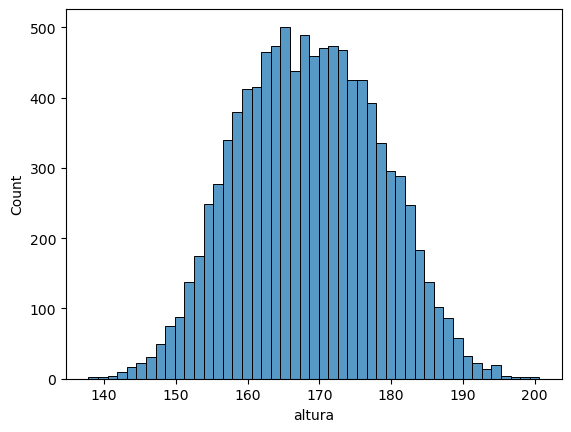

In [ ]:
sns.histplot(data=df, x="altura")

In [ ]:
df["altura"].skew()

0.04937008717355795

Vamos agora voltar a olhar com mais carinho pra algumas visualizações estatísticas!

____

### 1.3) Boxplot

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes **whiskers** inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

Limite inferior: $ \max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\} $.

Limite superior: $ \min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\} $.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<img src=https://miro.medium.com/max/8000/1*0MPDTLn8KoLApoFvI0P2vQ.png width=500>

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.

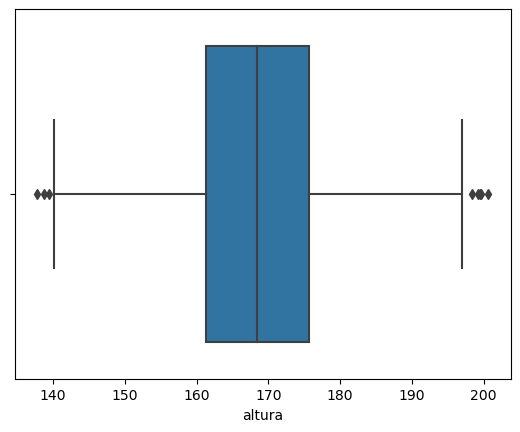

In [ ]:
sns.boxplot(data=df, x="altura");

_____________

### 1.4) Outliers

**Outliers** ou **discrepantes** referem-se a obsevações **extremas**, que se deslocam em muito das outras observações em um conjunto de dados, ou seja, que **destoam do padrão da distribuição** dos dados.

Outliers podem existir por motivos diferentes, alguns dos quais são:

- erro na entrada de dados (erro humano);
- erro na medição/coleta dos dados (erro instrumental);
- erros experimentais (planejamento/execução dos experimentos);
- outliers naturais (não decorrente de erros).

No caso dos erros, é importante que os outliers sejam tratados (comumente são removidos).

Por outro lado, outliers naturais são importantes constituintes dos dados, de modo que não devem ser eliminados -- mas, muitas vezes, devem ser tratados.

De qualquer modo, antes de começarmos a pensar em como **tratar** os outliers, o primeiro passo é **identificá-los**. Para discussões interessantes sobre outliers, como identificá-los e tratá-los, dê uma olhada [neste post](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623) ou [neste](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561).

Aqui veremos as duas maneiras mais simples de identificar outliers:

__1.4.1) Z-score (desvio padrão)__

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$

Como vimos anteriormente, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 1.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos.**

Conforme percebemos, há considerável diferença entre os níveis categóricos de sexo. Sendo assim, vamos separar nossa amostra:

<AxesSubplot:xlabel='altura', ylabel='Count'>

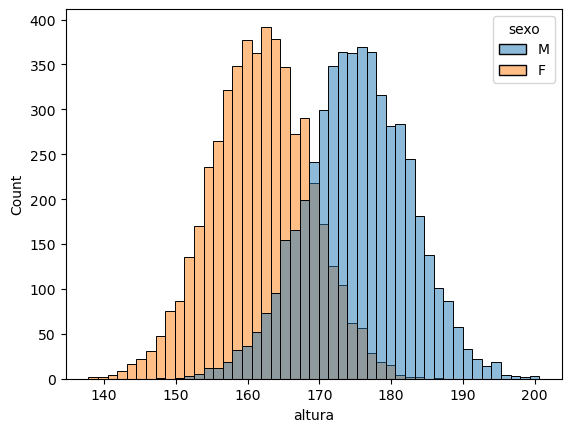

In [ ]:
sns.histplot(data=df, x="altura", hue="sexo")

Parece que as distribuições são aproximadamente normais!

In [ ]:
dados["F"]["z_score_altura"] = dados["F"]["altura"].apply(lambda x: (x-dados["F"]["altura"].mean())/dados["F"]["altura"].std())

In [ ]:
dados["F"]["altura"].mean()

161.8201879999998

In [ ]:
dados["F"][dados["F"]["z_score_altura"].apply(lambda x: abs(x) > 3)]

,sexo,altura,peso,z_score_altura
5103,F,182.86,80.45,3.072167
5345,F,140.55,40.08,-3.105806
6624,F,138.73,32.38,-3.371557
7162,F,183.97,80.73,3.234246
7294,F,139.38,35.66,-3.276646
7311,F,186.41,86.22,3.590527
7617,F,140.08,40.29,-3.174434
7856,F,183.55,85.47,3.172919
8635,F,183.11,87.33,3.108671
9285,F,137.83,29.35,-3.502972


____

__1.4.2) Boxplot whisker (IQR)__

Neste método, outliers são identificados como **os pontos que estão para além dos whiskers em um boxplot**.

Se você estiver interessado em saber porque os whiskers são definidios comumente com este fator 1.5 no "1.5\*IQR", dê uma olhada [neste post!](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [ ]:
q3 = np.quantile(dados["F"]["altura"], q=0.75)
q1 = np.quantile(dados["F"]["altura"], q=0.25)

iqr_altura_f = q3 - q1

whisker_max = q3 + 1.5*iqr_altura_f
whisker_min = q1 - 1.5*iqr_altura_f


whisker_min, whisker_max

(143.23000000000002, 180.51)

In [ ]:
x = 190

x < whisker_min or x > whisker_max

True

In [ ]:
dados["F"][dados["F"]["altura"].apply(lambda x: x < whisker_min or x > whisker_max)]

,sexo,altura,peso,z_score_altura
5074,F,142.65,41.19,-2.799170
5103,F,182.86,80.45,3.072167
5345,F,140.55,40.08,-3.105806
5360,F,141.40,31.29,-2.981692
5732,F,142.44,42.86,-2.829834
5740,F,142.52,36.53,-2.818153
6116,F,181.45,79.40,2.866283
6176,F,141.86,47.07,-2.914524
6624,F,138.73,32.38,-3.371557
6625,F,141.58,49.04,-2.955409


A relação entre os dois métodos acima pode ser compreendida com a seguinte imagem:

<img src="https://miro.medium.com/max/700/1*J5Xm0X-phCJJ-DKZMZ_88w.png">